In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("students_score.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [11]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# 1) Drop Unnamed column  

In [35]:
df = df.drop("Unnamed: 0", axis = 1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# 2) Gender Distribution

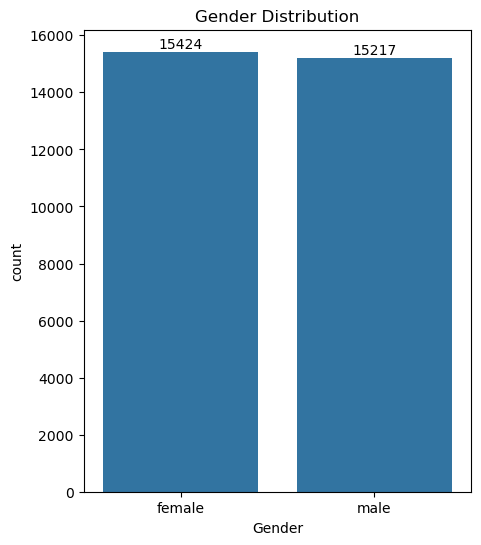

In [118]:
plt.figure(figsize= (5,6))
gr = sns.countplot(x = "Gender", data = df)
plt.title("Gender Distribution")
gr.bar_label(gr.containers[0])
plt.show()

### From the above chart we analysed that:
#### The number of females are more than the number of males.

## -----------------------------------------------------------------------------------------------------------

# 3) Calculate all mean scores with respective of Parent Education

In [113]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


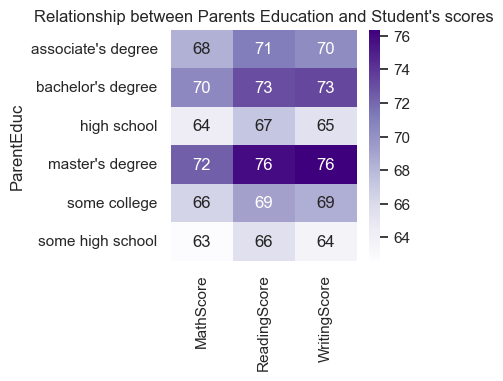

In [115]:
plt.figure(figsize= (3,3))
sns.heatmap(gb, annot = True, cmap="Purples")
plt.title("Relationship between Parents Education and Student's scores")
plt.show()

### From the above chart we analysed that, The education of parents have a greater chance of impact on their children.

## ---------------------------------------------------------------------------------------------------------

# 4) Similar as 3, Calculate mean scores respective of their Ethnic Groups

In [88]:
gb1 = df.groupby("EthnicGroup").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.695723     68.438233     66.999240
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060


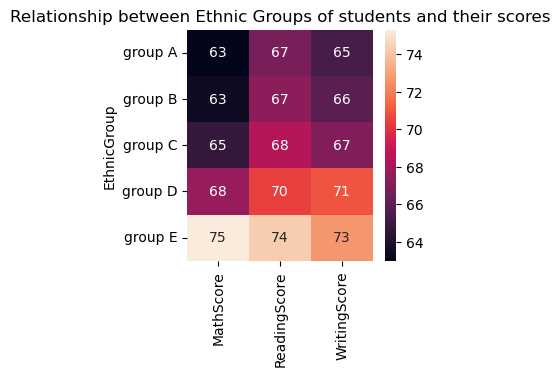

In [113]:
plt.figure(figsize= (3,3))
sns.heatmap(gb1, annot = True)
plt.title("Relationship between Ethnic Groups of students and their scores")
plt.show()

#### From the above chart we analysed that, Ethnic Groups like group E are performing better than other Ethnic Groups.
#### Ethnic Groups like A & B requires improvement in their respective scores.

## ------------------------------------------------------------------------------------------------------

# 5) Construct the boxplot and identify the outliers based on their scores.

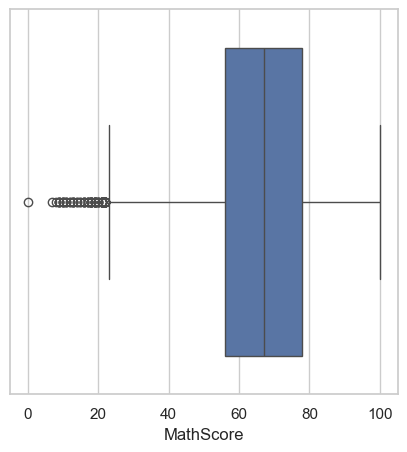

In [121]:
plt.figure(figsize=(5, 5))
sns.boxplot(data = df, x = "MathScore")
plt.show()

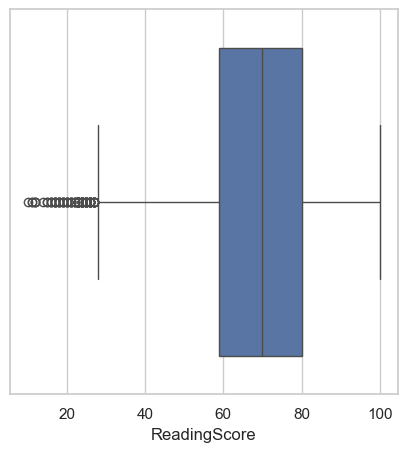

In [123]:
plt.figure(figsize=(5, 5))
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

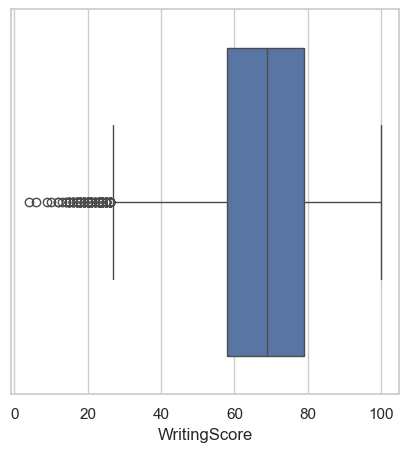

In [125]:
plt.figure(figsize=(5, 5))
sns.boxplot(data = df, x = "WritingScore")
plt.show()

#### From the above three boxplot charts, we can conclude that Maths is the most difficult subject for students.
#### Because in Maths, the minimum marks is closer to 20, and there is a extreme outlier, where a student got 0 marks.

## --------------------------------------------------------------------------------------------------------

# 6)Distribution of Ethnic Groups

In [41]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


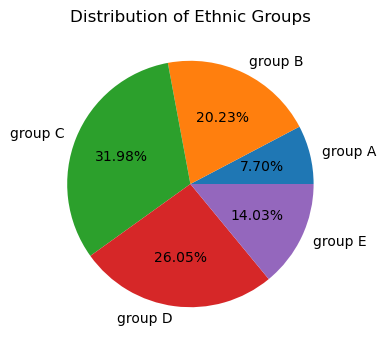

In [81]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()
lst = ["group A","group B","group C","group D","group E"]
mlst = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.figure(figsize=(4, 4))
plt.title("Distribution of Ethnic Groups")
plt.pie(mlst,labels = lst, autopct = "%1.2f%%")

plt.show()


## ---------------------------------------------------------------------------------------------------------

# 7) Check whether students practicing sport have any effect on their Studies.

In [85]:
sports = df.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(sports)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


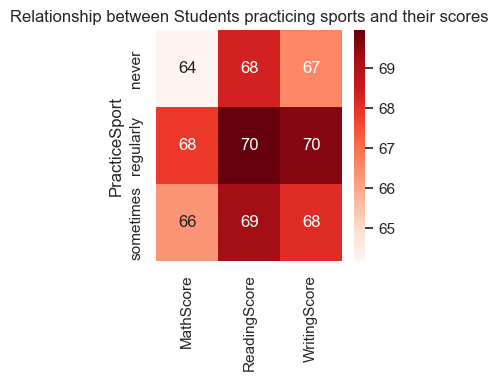

In [142]:
plt.figure(figsize= (3,3))
sns.heatmap(sports, annot = True, cmap="Reds")
plt.title("Relationship between Students practicing sports and their scores")
plt.show()

#### From the above chart, we can conclude that students who practice sports regularly have a better scores than students who doesnt practice any sport or practice sports sometimes.

## -----------------------------------------------------------------------------------------------------

# 8) Check whether Students (weekly study hours) have an impact on their MathScores based on their Gender

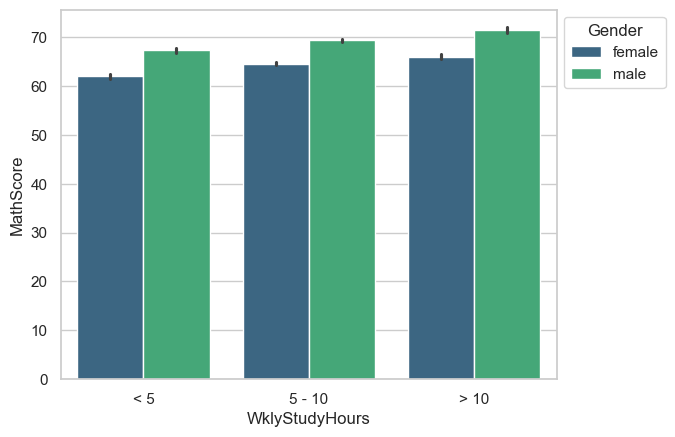

In [127]:
ax = sns.barplot(x='WklyStudyHours', y='MathScore', data=df, hue='Gender', palette='viridis')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### Male Students have a slight edge over Females.